In [22]:
import numpy as np
import pandas as pd
import scipy.io
from scipy import special
from scipy import optimize
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import cm, colors, patches, lines
import seaborn as sns
# import plotly as py
# import plotly.express as px
from datetime import date
from glob import glob
from os.path import join, exists
import random
from random import random as rand

from datetime import date

from tqdm import tqdm

import pingouin as pg

In [23]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

In [24]:
# %config InlineBackend.figure_format = 'retina'
# py.offline.init_notebook_mode(connected = True)

In [25]:
np.set_printoptions(precision=5, suppress=True)

In [26]:
def convert_ID(ID):
    ##################   ##################
    #  1  2  3  4  5 #   #        2       #
    #  6  7  8  9 10 #   #        1       #
    # 11 12 13 14 15 # = # -2 -1  0  1  2 #
    # 16 17 18 19 20 #   #       -1       #
    # 21 22 23 24 25 #   #       -2       #
    ##################   ##################
    x = np.kron(np.ones(5),np.arange(-2,3)).astype(int)
    y = np.kron(np.arange(2,-3,-1),np.ones(5)).astype(int)
    pos = np.array((x[ID-1],y[ID-1]))
    return pos

In [27]:
def calc_hit(file_behav, tpr=97, nrun=6):
    ##### parameters #####
    ## file_behav: 불러올 .mat 파일 경로
    ## tpr: trial per run, default=97 (GA project)
    ## nrun: 불러올 run 수, 예) nrun=4 일 경우, r01~r04 까지 데이터를 불러옴
    
    datum = scipy.io.loadmat(file_behav)
    
    ## frame per trial
    fpt = int(datum['nSampleTrial'][0][0])
    ## second per trial
    spt = int(fpt/60.)
    ## a number of trials per run
    # tpr = datum['nTrialperRun'][0][0]
#     tpr = 97  # 12 trial/block * 8 block/run + 1 = 97 trial/run

    ## target ID
    tmp = datum['targetID'][0]
    targetID = tmp[tmp!=0][:tpr*nrun]

    bx = datum['boxSize'][0][0]
    pos = bx*convert_ID(targetID)
    
    ## 60 Hz * {5 s/trial * (1 trial + 12 trial/block * 8 block)}/Run * 3 Run = 87300
    allXY = datum['allXY']
    
    xFrame, yFrame = np.array([datum['xFrame'].squeeze(), datum['yFrame'].squeeze()]).astype(int)
    
    ## target position
    tmp = np.zeros(allXY.shape)
    for i in range(fpt*tpr*nrun):
        t = np.floor(i/fpt).astype(int)
        tmp[0][i], tmp[1][i] = pos[0][t], pos[1][t]

    ## Is it hit?
    err = allXY - tmp
    hit = np.zeros(fpt*tpr*nrun)
    for i in range(fpt*tpr*nrun):
        hit[i] = abs(err[0][i]) <= bx*.5 and abs(err[1][i]) <= bx*.5
        
    return hit

# Preprocessing

In [28]:
dir_root = '/mnt/ext5/GP'

## GA

In [29]:
# dir_work = '/home/sungbeenpark/Github/labs/GA'
# dir_data = join(dir_work, 'behav_data')
# list_behav = sorted(glob(join(dir_data, '*-fmri.mat')))

# df_GA = pd.DataFrame(columns=['subj', 'group']+[block for block in range(8*6)], index=range(len(list_behav)))
# for i, fname in enumerate(tqdm(list_behav)):
#     subj = fname.split('/')[-1].split('-')[-2]
#     df_GA.loc[i]['subj'] = subj
#     df_GA.loc[i]['group'] = 'GA'
#     hit = calc_hit(fname, tpr=97)
#     for block in range(8*6):
#         run = block // 8 + 1
#         df_GA.loc[i][block] = hit[ 300*(12*block + run) : 300*(12*(block+1) + run) ].mean()

# df_GA.to_csv('./../data/df_GA.csv', index=False)

# # df_GA

## GB

In [30]:
# dir_work = '/home/sungbeenpark/Github/labs/GA'
# dir_data = join(dir_work, 'behav_data')
# list_behav = sorted(glob(join(dir_data, '*-refmri.mat')))

# df_GB = pd.DataFrame(columns=['subj', 'group']+[block for block in range(8*6)], index=range(len(list_behav)))
# for i, fname in enumerate(tqdm(list_behav)):
#     subj = fname.split('/')[-1].split('-')[-2]
#     df_GB.loc[i]['subj'] = subj.replace('GA','GB')
#     df_GB.loc[i]['group'] = 'GB'
#     hit = calc_hit(fname, tpr=97)
#     for block in range(8*6):
#         run = block // 8 + 1
#         df_GB.loc[i][block] = hit[ 300*(12*block + run) : 300*(12*(block+1) + run) ].mean()

# df_GB.to_csv('./../data/df_GB.csv', index=False)
        
# # df_GB

## GD

In [31]:
# dir_work = '/home/sungbeenpark/Github/labs/GD'
# dir_data = join(dir_work, 'behav_data')
# list_behav = sorted(glob(join(dir_data, '*-refmri.mat')))

# df_GD = pd.DataFrame(columns=['subj', 'group']+[block for block in range(8*6)], index=range(len(list_behav)))
# for i, fname in enumerate(tqdm(list_behav)):
#     subj = fname.split('/')[-1].split('-')[-2]
#     df_GD.loc[i]['subj'] = subj
#     df_GD.loc[i]['group'] = 'GD'
#     hit = calc_hit(fname, tpr=97)
#     for block in range(8*6):
#         run = block // 8 + 1
#         df_GD.loc[i][block] = hit[ 300*(12*block + run) : 300*(12*(block+1) + run) ].mean()

# df_GD.to_csv('./../data/df_GD.csv', index=False)

# # df_GD

## GP

In [33]:
len(list_dlPFC_20Hz)

16

In [32]:
list_dlPFC_cTBS = [
    '09', '10', '18', '21', '22'
    , '24', '27', '34', '35', '36'
    , '38', '42', '57', '59', '62'
    , '66', '67'
]
list_M1_cTBS = [
    '08', '11', '17', '19', '20'
    , '26', '32', '33', '37', '39'
    , '40', '41', '56', '58', '61'
    , '63', '65'
]
## GP50 = GP26
list_dlPFC_20Hz = [
    '43', '44', '45', '46', '47'
    , '48', '49', '51', '53', '54'
    , '55', '71', '72', '73', '74',
    '75'
#     , '50'
]

### DLPFC

In [12]:
# dir_data = join(dir_root, 'behav_data')

# list_behav = []
# for s in list_dlPFC_cTBS:
#     list_behav.append(join(dir_data, 'GP%s-fmri.mat'%s))
    
# df_GP_dlpfc = pd.DataFrame(columns=['subj', 'group']+[block for block in range(8*3)], index=range(len(list_behav)))
# for i, fname in enumerate(tqdm(list_behav)):
#     subj = fname.split('/')[-1].split('-')[-2]
#     df_GP_dlpfc.loc[i]['subj'] = subj
#     df_GP_dlpfc.loc[i]['group'] = 'GP_dlPFC_cTBS'
#     hit = calc_hit(fname, tpr=97, nrun=3)
#     for block in range(8*3):
#         run = block // 8 + 1
#         df_GP_dlpfc.loc[i][block] = hit[ 300*(12*block + run) : 300*(12*(block+1) + run) ].mean()

# df_GP_dlpfc.to_csv('./../data/df_GP_dlpfc.csv', index=False)

# # df_GP_dlpfc

### M1

In [13]:
# dir_data = join(dir_root, 'behav_data')

# list_behav = []
# for s in list_M1_cTBS:
#     list_behav.append(join(dir_data, 'GP%s-fmri.mat'%s))
    
# df_GP_m1 = pd.DataFrame(columns=['subj', 'group']+[block for block in range(8*3)], index=range(len(list_behav)))
# for i, fname in enumerate(tqdm(list_behav)):
#     subj = fname.split('/')[-1].split('-')[-2]
#     df_GP_m1.loc[i]['subj'] = subj
#     df_GP_m1.loc[i]['group'] = 'GP_M1_cTBS'
#     hit = calc_hit(fname, tpr=97, nrun=3)
#     for block in range(8*3):
#         run = block // 8 + 1
#         df_GP_m1.loc[i][block] = hit[ 300*(12*block + run) : 300*(12*(block+1) + run) ].mean()

# df_GP_m1.to_csv('./../data/df_GP_m1.csv', index=False)

# # df_GP_m1

### 20 Hz (high)

In [15]:
# dir_data = join(dir_root, 'behav_data')

# list_behav = []
# for s in list_dlPFC_20Hz:
#     list_behav.append(join(dir_data, 'GP%s-fmri.mat'%s))
    
# df_GP_high = pd.DataFrame(columns=['subj', 'group']+[block for block in range(8*3)], index=range(len(list_behav)))
# for i, fname in enumerate(tqdm(list_behav)):
#     subj = fname.split('/')[-1].split('-')[-2]
#     df_GP_high.loc[i]['subj'] = subj
#     df_GP_high.loc[i]['group'] = 'GP_dlPFC_20Hz'
#     hit = calc_hit(fname, tpr=97, nrun=3)
#     for block in range(8*3):
#         run = block // 8 + 1
#         df_GP_high.loc[i][block] = hit[ 300*(12*block + run) : 300*(12*(block+1) + run) ].mean()

# df_GP_high.to_csv('./../data/df_GP_20Hz.csv', index=False)

# # df_GP_high

# Figure 2

In [16]:
df_GA = pd.read_csv('./../data/df_GA.csv')
df_GP_dlpfc = pd.read_csv('./../data/df_GP_dlpfc.csv')
df_GP_m1 = pd.read_csv('./../data/df_GP_m1.csv')
df_GP_high = pd.read_csv('./../data/df_GP_20Hz.csv')

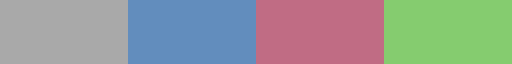

In [17]:
tmp = cm.turbo(np.linspace(0.1,1.0,4))
palette = [colors.rgb2hex(rgb, keep_alpha=False) for rgb in tmp][:3]
#           No-stim    DLPFC      M1         20 Hz
palette = ['#A9A9A9', '#628dbd', '#C06C84', '#85cc6f']
colors.ListedColormap(palette)

## Figure 2 A

In [18]:
def df_as_long(df, nblock=24):
    df_res = pd.DataFrame(columns=['subj', 'group', 'block', 'reward'])
    row = 0
    for i, subj in enumerate(list(df['subj'])):
        for block in range(nblock):
            new_columns = list(df.columns[:2]) + [int(col) for col in df.columns[2:]]
            df.columns = new_columns
            df_res.loc[row, 'subj'] = subj
            df_res.loc[row, 'group'] = df.loc[i, 'group']
            df_res.loc[row, 'block'] = block
            df_res.loc[row, 'reward'] = df.loc[i, block]
            row += 1
    return df_res

In [19]:
df_fig2A_long = pd.concat([df_as_long(df_GA), df_as_long(df_GP_dlpfc), df_as_long(df_GP_m1), 
                          df_as_long(df_GP_high)], ignore_index=True)

In [20]:
df_fig2A_long.group = df_fig2A_long.group.replace('GA', 'No stim')
df_fig2A_long.group = df_fig2A_long.group.replace('GP_dlPFC_cTBS', r'DLPFC$_{cTBS}$')
df_fig2A_long.group = df_fig2A_long.group.replace('GP_M1_cTBS', r'M1$_{cTBS}$')
df_fig2A_long.group = df_fig2A_long.group.replace('GP_dlPFC_20Hz', r'DLPFC$_{20Hz}$')
list_group = ['No stim',r'DLPFC$_{cTBS}$',r'M1$_{cTBS}$',r'DLPFC$_{20Hz}$']
df_fig2A_long

,subj,group,block,reward
0,GA01,No stim,0,0.225833
1,GA01,No stim,1,0.221389
2,GA01,No stim,2,0.370833
3,GA01,No stim,3,0.316389
4,GA01,No stim,4,0.341389
...,...,...,...,...
1915,GP75,DLPFC$_{20Hz}$,19,0.363333
1916,GP75,DLPFC$_{20Hz}$,20,0.253333
1917,GP75,DLPFC$_{20Hz}$,21,0.213611
1918,GP75,DLPFC$_{20Hz}$,22,0.25


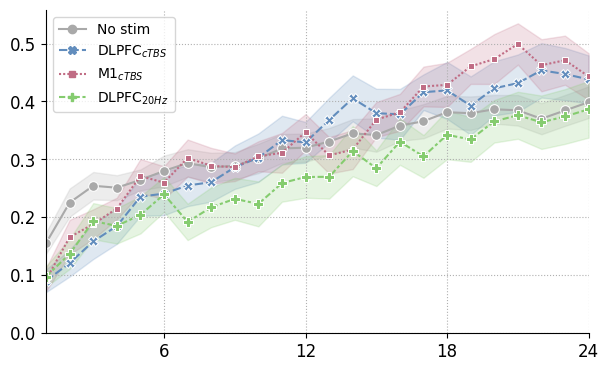

In [21]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(7, 4.2))

ax = sns.lineplot(
    data=df_fig2A_long, x='block', y='reward', hue='group', style='group',
    hue_order=list_group, dashes=True, markers=True, markersize=7,
    errorbar=("se", 1), err_style='band',
    palette=palette
)

# ax.set_xlabel('Block', fontsize=16)
# ax.set_ylabel('Performance', fontsize=16)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.legend()

ax.set_xlim(0, 23)
ax.set_ylim(0)

major = [5, 11, 17, 23]
ax.set_xticks(major)
ax.set_xticklabels([x + 1 for x in major])
ax.grid(linestyle=':')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# fname = '/home/kjh/Desktop/GP/figures/fig2/fig2A.png'
# plt.savefig(fname, dpi=600)
# plt.close()

## Figure 2 B

In [147]:
df_fig2A_long

,subj,group,block,reward
0,GA01,No stim,0,0.225833
1,GA01,No stim,1,0.221389
2,GA01,No stim,2,0.370833
3,GA01,No stim,3,0.316389
4,GA01,No stim,4,0.341389
...,...,...,...,...
1795,GP55,DLPFC$_{20Hz}$,19,0.244722
1796,GP55,DLPFC$_{20Hz}$,20,0.261667
1797,GP55,DLPFC$_{20Hz}$,21,0.213056
1798,GP55,DLPFC$_{20Hz}$,22,0.137222


In [148]:
df_fig2B = df_fig2A_long.groupby(['subj', 'group']).mean()
df_fig2B.reset_index(drop=False, inplace=True)
df_fig2B

,subj,group,block,reward
0,GA01,No stim,11.5,0.366991
1,GA02,No stim,11.5,0.446898
2,GA05,No stim,11.5,0.397407
3,GA07,No stim,11.5,0.279699
4,GA08,No stim,11.5,0.442072
...,...,...,...,...
70,GP62,DLPFC$_{cTBS}$,11.5,0.541481
71,GP63,M1$_{cTBS}$,11.5,0.317882
72,GP65,M1$_{cTBS}$,11.5,0.254988
73,GP66,DLPFC$_{cTBS}$,11.5,0.438137


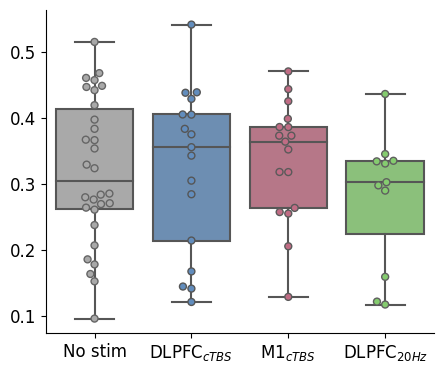

In [161]:
fig, ax = plt.subplots(figsize=(5, 4.2))

ax1 = sns.swarmplot(
    data=df_fig2B, x='group', y='reward',
    order=list_group, size=5, linewidth=1,
    palette=palette, ax=ax, #edgecolor='1'
)

ax2 = sns.boxplot(
    data=df_fig2B,
    x='group', y='reward',
    order=list_group, palette=palette, ax=ax
)

# ax.set_xlabel('Stimulation group', fontsize=16)
# ax.set_ylabel('Reward average', fontsize=16)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# fname = '/home/kjh/Desktop/GP/figures/fig2/fig2B.png'
# plt.savefig(fname, dpi=600)
# plt.close()

### Statistics

In [162]:
df_fig2B

,subj,group,block,reward
0,GA01,No stim,11.5,0.366991
1,GA02,No stim,11.5,0.446898
2,GA05,No stim,11.5,0.397407
3,GA07,No stim,11.5,0.279699
4,GA08,No stim,11.5,0.442072
...,...,...,...,...
70,GP62,DLPFC$_{cTBS}$,11.5,0.541481
71,GP63,M1$_{cTBS}$,11.5,0.317882
72,GP65,M1$_{cTBS}$,11.5,0.254988
73,GP66,DLPFC$_{cTBS}$,11.5,0.438137


In [171]:
df_fig2B['reward'] = pd.to_numeric(df_fig2B['reward'], errors='coerce')

pg.anova(
    data=df_fig2B,
    dv='reward', between='group',
    detailed=False, effsize="np2"
)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,3,71,0.651302,0.584749,0.026783
